<a href="https://colab.research.google.com/github/ahoucbvtw/WeatherForecast/blob/main/Weather_Forecast_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install / Import Library**

In [1]:
!pip install neuralprophet

     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 748.8MB 21kB/s 
     |████████████████████████████████| 81kB 3.8MB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

# **Make Class**

In [12]:
class WeatherForecast:
    def __init__(self, data):
        self.weather_df = pd.read_csv(data)
        self.choosed_df = None
        self.model = None
        self.target_df = None
    
    def showcity(self):
        # 顯示資料集(dataframe)中有哪些城鎮名稱        
        city_name = self.weather_df.Location.unique()
        city_counts = len(self.weather_df.Location.unique())

        return city_name, city_counts

    def showcityfordata(self, city):
        # 顯示資料集(dataframe)中該城鎮的所有資料/columns
        # Choose a City whitch You Want to show
        self.choosed_df = self.weather_df[self.weather_df["Location"] == city]

        # Change "Date" column's datatype to datetime
        self.choosed_df["Date"] = pd.to_datetime(self.choosed_df["Date"])

        return self.choosed_df, self.choosed_df.columns

    def maketarget_df(self, data_variable):
        
        self.target_df = self.choosed_df[["Date", data_variable]]
        self.target_df.dropna(inplace = True)
        self.target_df.columns = ["ds", "y"]

        return self.target_df


    def open_model(self, model_name):
        with open(model_name, "rb") as f:
            self.model = pickle.load(f)

    def save_model(self, model_name):
        with open(model_name, "wb") as f:
            pickle.dump(self.model, f)

    def training(self, city, data_variable, model_name, epochs = 2000):
        # 先產生選擇好的城鎮+欲訓練資料的dataframe
        self.showcityfordata(city)
        self.maketarget_df(data_variable)

        self.model = NeuralProphet()
        train_model = self.model.fit(self.target_df, freq = "D", epochs = epochs)

        self.save_model(model_name)
        
        return train_model
    
    def weatherforecast(self, model_name, city, data_variable, days = 7):
        # 利用輸入的city及data_variable來預測未來data_variable的值
        self.open_model(model_name)
        self.showcityfordata(city)
        self.maketarget_df(data_variable)
        

        data2model_predict = self.model.make_future_dataframe(self.target_df, periods = days)
        forecast = self.model.predict(data2model_predict)

        # Make predict dataframe's ds & yhat1 columns as a new Date & data_variable dataframe
        ds = forecast["ds"]
        yhat1 = forecast["yhat1"]
        forecastdf_data = {"Date": ds, data_variable: yhat1}

        forecast_df = pd.DataFrame(forecastdf_data)        
        plot = self.model.plot(forecast)
                
        return forecast_df


# **Use Class**

In [4]:
a = WeatherForecast("weatherAUS.csv")

print("City in AUS：",a.showcity()[0])
print("City counts in AUS：",a.showcity()[1])

City in AUS： ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
City counts in AUS： 49


In [ ]:
# Show data whitch you typed city
a.showcityfordata("Sydney")[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,SSE,22.0,20.0,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
33516,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,ESE,20.0,7.0,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
33517,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,N,15.0,13.0,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
33518,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,W,17.0,19.0,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


In [ ]:
# Show dataframe's columns
print(a.showcityfordata("Sydney")[1])

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
# training
a.training("Sydney", "Sunshine", "saved_model_Sunshine.pkl", epochs = 2000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
Epoch[2000/2000]: 100%|██████████| 2000/2000 [06:12<00:00,  5.37it/s, SmoothL1Loss=0.0349, MAE=3.17, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.465938,11.653924,0.0
1,0.048793,3.602291,0.0
2,0.040942,3.382092,0.0
3,0.038763,3.326530,0.0
4,0.037758,3.280388,0.0
...,...,...,...
1995,0.034856,3.172786,0.0
1996,0.034855,3.172845,0.0
1997,0.034856,3.173050,0.0
1998,0.034855,3.172629,0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Sunshine
0,2017-06-26,5.882777
1,2017-06-27,5.867625
2,2017-06-28,6.020908
3,2017-06-29,6.117768
4,2017-06-30,6.043853
5,2017-07-01,6.396405
6,2017-07-02,6.250494


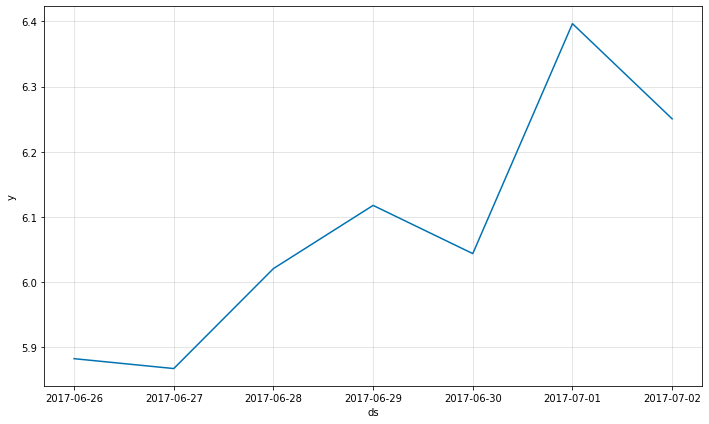

In [9]:
# weatherforecast for typed city
a.weatherforecast("saved_model_Sunshine.pkl", "Sydney", "Sunshine")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,MaxTemp
0,2017-06-26,18.311459
1,2017-06-27,18.314260
2,2017-06-28,18.238728
3,2017-06-29,18.498909
4,2017-06-30,18.464794
5,2017-07-01,18.418182
6,2017-07-02,18.393442


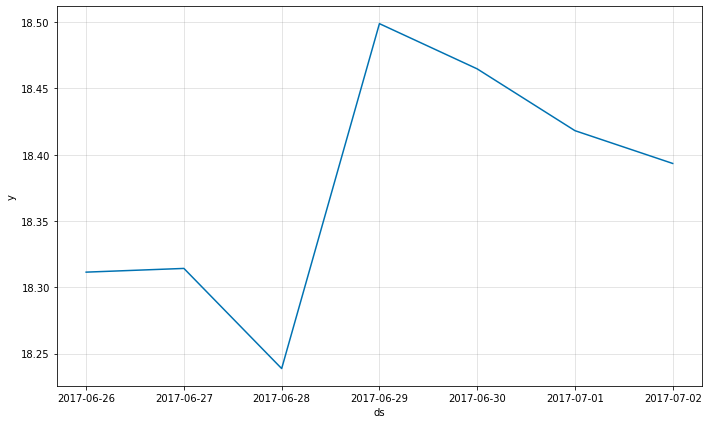

In [10]:
# weatherforecast for typed city
a.weatherforecast("saved_model_max.pkl", "Sydney", "MaxTemp")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,MinTemp
0,2017-06-26,10.089442
1,2017-06-27,10.083854
2,2017-06-28,9.955153
3,2017-06-29,10.067783
4,2017-06-30,9.977571
5,2017-07-01,9.868835
6,2017-07-02,9.772717


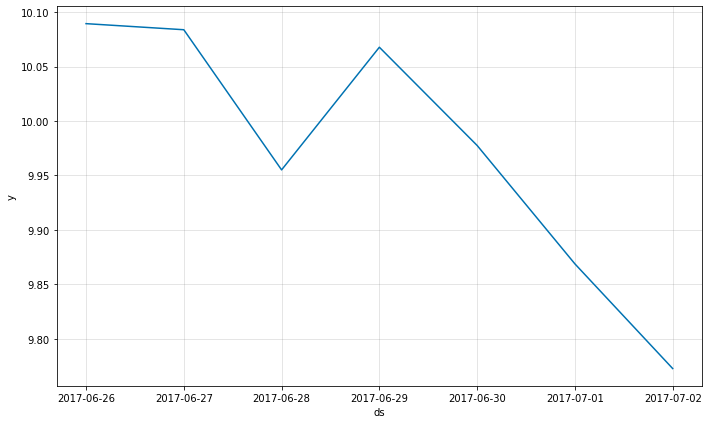

In [7]:
# weatherforecast for typed city
a.weatherforecast("saved_model_min.pkl", "Sydney", "MinTemp")